In [18]:
!pip install scikit-learn

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [72]:
df=pd.read_csv("monatszahlen2209_verkehrsunfaelle.csv")
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [73]:
df = df[["MONATSZAHL", "AUSPRÄGUNG", "JAHR", "MONAT", "WERT"]]
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN


In [74]:
df = df.drop(df[df.JAHR > 2020].index)

In [75]:
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0


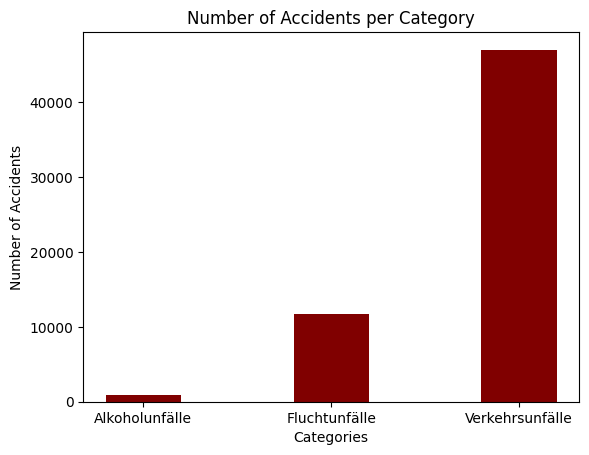

In [76]:
# Bar Graph for the number of accidents per category
plt.bar(df.MONATSZAHL, df.WERT, color ='maroon', width = 0.4)
plt.xlabel("Categories")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per Category")
plt.show()

In [77]:
# Filtering the data for the required category and type
df_filtered = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRÄGUNG'] == 'insgesamt')]

In [78]:
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 25 to 297
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MONATSZAHL  273 non-null    object 
 1   AUSPRÄGUNG  273 non-null    object 
 2   JAHR        273 non-null    int64  
 3   MONAT       273 non-null    object 
 4   WERT        273 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.8+ KB


In [79]:
# only keeping 'summe' data from monat in a dataframe
df_summe = df_filtered[df_filtered['MONAT'] == 'Summe']
df_summe.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
38,Alkoholunfälle,insgesamt,2019,Summe,434.0
51,Alkoholunfälle,insgesamt,2018,Summe,398.0
64,Alkoholunfälle,insgesamt,2017,Summe,409.0
77,Alkoholunfälle,insgesamt,2016,Summe,301.0


In [80]:
df_filtered = df_filtered.drop(df_filtered[df_filtered.MONAT == 'Summe'].index)
df_filtered.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
30,Alkoholunfälle,insgesamt,2020,202005,40.0


In [120]:
df_filtered['MONAT'].unique()

array(['202001', '202002', '202003', '202004', '202005', '202006',
       '202007', '202008', '202009', '202010', '202011', '202012',
       '201901', '201902', '201903', '201904', '201905', '201906',
       '201907', '201908', '201909', '201910', '201911', '201912',
       '201801', '201802', '201803', '201804', '201805', '201806',
       '201807', '201808', '201809', '201810', '201811', '201812',
       '201701', '201702', '201703', '201704', '201705', '201706',
       '201707', '201708', '201709', '201710', '201711', '201712',
       '201601', '201602', '201603', '201604', '201605', '201606',
       '201607', '201608', '201609', '201610', '201611', '201612',
       '201501', '201502', '201503', '201504', '201505', '201506',
       '201507', '201508', '201509', '201510', '201511', '201512',
       '201401', '201402', '201403', '201404', '201405', '201406',
       '201407', '201408', '201409', '201410', '201411', '201412',
       '201301', '201302', '201303', '201304', '201305', '2013

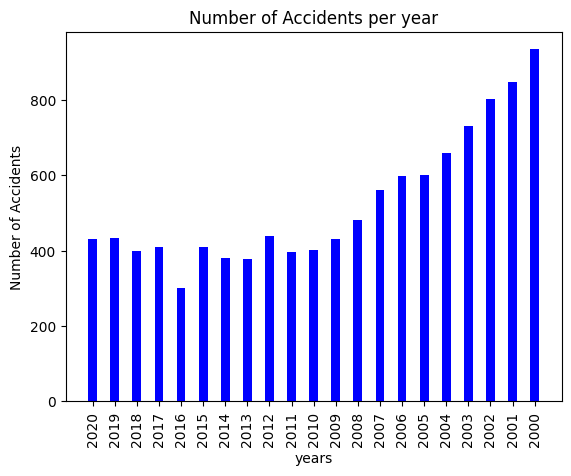

In [173]:
# Bar Graph for the number of accidents per year
plt.bar(df_summe.JAHR, df_summe.WERT, color ='blue', width = 0.4)
plt.xlabel("years")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per year")
plt.xticks(rotation=90)
# plt.figure(figsize=(10,8))
plt.show()

In [122]:
df_filtered['MONTH']= df_filtered['MONAT'].str[4:]
# df_filtered['YEAR']= df_filtered['MONAT'].str[4:]
df_filtered.head()


,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,MONTH
26,Alkoholunfälle,insgesamt,2020,202001,28.0,01
27,Alkoholunfälle,insgesamt,2020,202002,40.0,02
28,Alkoholunfälle,insgesamt,2020,202003,27.0,03
29,Alkoholunfälle,insgesamt,2020,202004,26.0,04
30,Alkoholunfälle,insgesamt,2020,202005,40.0,05


In [179]:
df_filtered['date']=pd.to_datetime(df_filtered['JAHR']+ '-' + df_filtered['MONTH'])
df_filtered.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,MONTH,date
26,Alkoholunfälle,insgesamt,2020,202001,28.0,01,2020-01-01
27,Alkoholunfälle,insgesamt,2020,202002,40.0,02,2020-02-01
28,Alkoholunfälle,insgesamt,2020,202003,27.0,03,2020-03-01
29,Alkoholunfälle,insgesamt,2020,202004,26.0,04,2020-04-01
30,Alkoholunfälle,insgesamt,2020,202005,40.0,05,2020-05-01


In [180]:
counts = df_filtered['WERT'].groupby(df_filtered['MONTH']).sum()

In [318]:
df_com=df_filtered[['date','WERT']]
df_input = df_filtered[['date']].copy()
df_input.head()


,date
26,2020-01-01
27,2020-02-01
28,2020-03-01
29,2020-04-01
30,2020-05-01


In [321]:
df_output = df_filtered[['WERT']].copy()
df_output.head()

,WERT
26,28.0
27,40.0
28,27.0
29,26.0
30,40.0


In [322]:
df_com.set_index('date',inplace=True)


In [323]:
df_com=df_com.sort_index(ascending=True)
df_com.head()

,WERT
date,
2000-01-01,78.0
2000-02-01,53.0
2000-03-01,73.0
2000-04-01,78.0
2000-05-01,96.0


In [324]:
df_com.describe()

,WERT
count,252.000000
mean,43.753968
std,18.069448
min,10.000000
25%,30.750000
50%,40.000000
75%,53.250000
max,107.000000


<Axes: xlabel='date'>

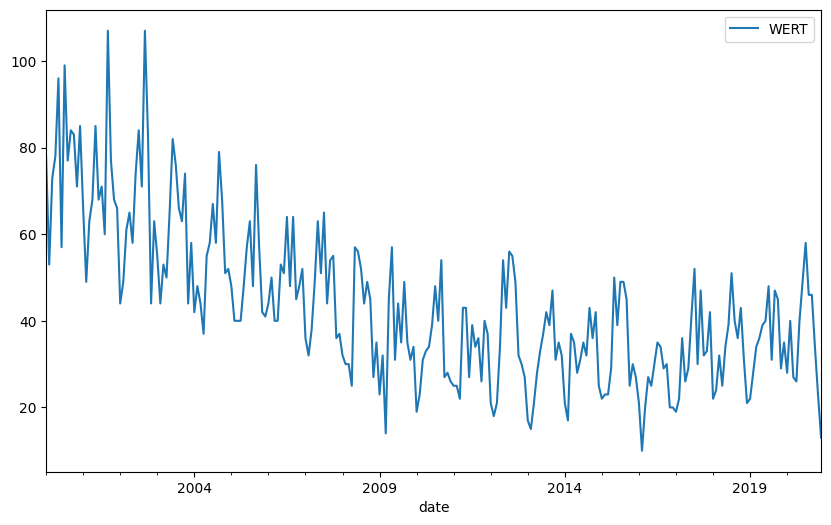

In [325]:
df_com.plot(figsize=(10,6))

In [269]:
!pip install statsmodels

In [326]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [327]:
adf_test(df_com['WERT'])

ADF Statistics: -2.778474040626481
p- value: 0.061414994217069516
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [328]:
df_com['WERT First Difference']=df_com['WERT']-df_com['WERT'].shift(1)

In [329]:
df_com.head()

,WERT,WERT First Difference
date,,
2000-01-01,78.0,NaN
2000-02-01,53.0,-25.0
2000-03-01,73.0,20.0
2000-04-01,78.0,5.0
2000-05-01,96.0,18.0


In [330]:
adf_test(df_com['WERT First Difference'].dropna())
#Data is stationary , now we will take d = 1

ADF Statistics: -4.5492970163624875
p- value: 0.00016001189638451828
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [331]:
df_com['WERT 12 Difference']=df_com['WERT']-df_com['WERT'].shift(12)
df_com

,WERT,WERT First Difference,WERT 12 Difference
date,,,
2000-01-01,78.0,NaN,NaN
2000-02-01,53.0,-25.0,NaN
2000-03-01,73.0,20.0,NaN
2000-04-01,78.0,5.0,NaN
2000-05-01,96.0,18.0,NaN
...,...,...,...
2020-08-01,46.0,-12.0,15.0
2020-09-01,46.0,0.0,-1.0
2020-10-01,34.0,-12.0,-11.0


In [332]:
adf_test(df_com['WERT 12 Difference'].dropna())

ADF Statistics: -3.358728737351916
p- value: 0.012448890266152023
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


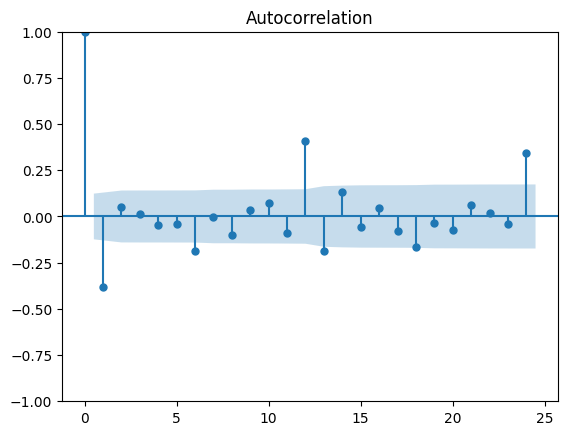

In [333]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf=plot_acf(df_com['WERT First Difference'].dropna())

c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


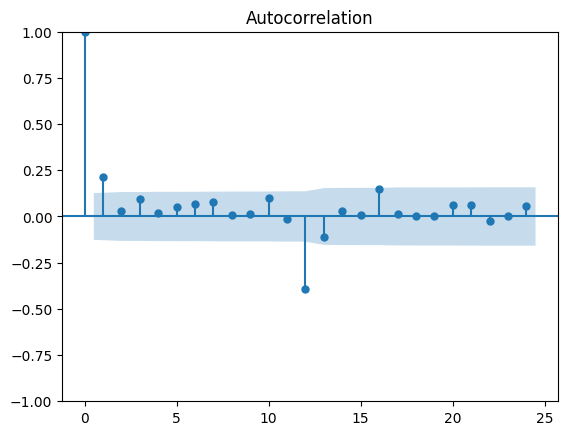

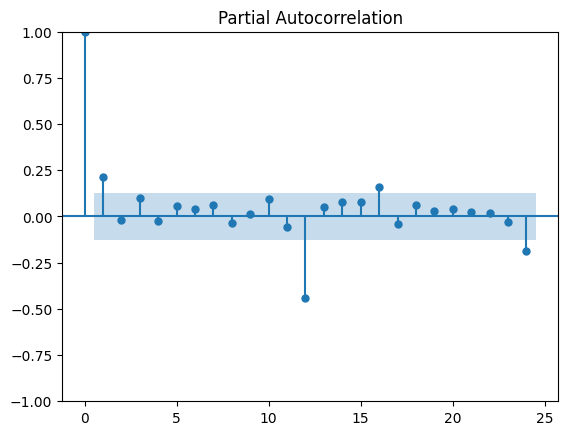

In [334]:
acf12=plot_acf(df_com['WERT 12 Difference'].dropna())
pacf12=plot_pacf(df_com['WERT 12 Difference'].dropna())

<Axes: xlabel='date'>

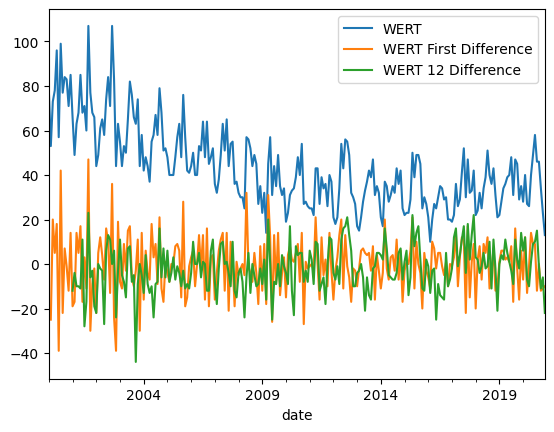

In [335]:
df_com.plot()

In [401]:
# from statsmodels.tsa.arima.model import ARIMA
# model=ARIMA(df_com['WERT'],order=(1,1,1))
# # model_fit=model.fit()

In [400]:
# model_fit.summary()

In [402]:
# df_com['forecast']=model_fit.predict(start=90,end=108,dynamic=True)
# df_com[['WERT','forecast']].plot(figsize=(12,8))

In [403]:
# import statsmodels.api as sm
# model=sm.tsa.statespace.SARIMAX(df_com['WERT'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
# results=model.fit()
# df_com['forecast']=results.predict(start=90,end=108,dynamic=True)
# df_com[['WERT','forecast']].plot(figsize=(12,8))

In [301]:
# from pandas.tseries.offsets import DateOffset
# future_dates=[df_com.index[-1]+ DateOffset(months=x)for x in range(0,24)]


In [302]:
# future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_com.columns)
# future_datest_df.tail()
# future_df=pd.concat([df_com,future_datest_df])



In [404]:
# future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
# future_df[['WERT', 'forecast']].plot(figsize=(12, 8))

In [405]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2015,12,1)
test_dataset_end=datetime(2020,12,1)


In [424]:
train_data=df_com[:train_dataset_end]
test_data=df_com[train_dataset_end+timedelta(days=1):test_dataset_end]


In [407]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [408]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_com['WERT'],order=(1,1,1))
model_fit=model.fit()

c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [409]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WERT   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -962.013
Date:                Sat, 11 Mar 2023   AIC                           1930.027
Time:                        13:16:08   BIC                           1940.603
Sample:                    01-01-2000   HQIC                          1934.283
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4003      0.073      5.464      0.000       0.257       0.544
ma.L1         -0.9261      0.031    -30.005      0.000      -0.987      -0.866
sigma2       124.3188     10.243     12.137      0.000     104.243     144.394
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):                12.68
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [410]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2016-01-01 00:00:00
2020-12-01 00:00:00


In [411]:
pred=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['WERT']-pred

<Axes: ylabel='Density'>

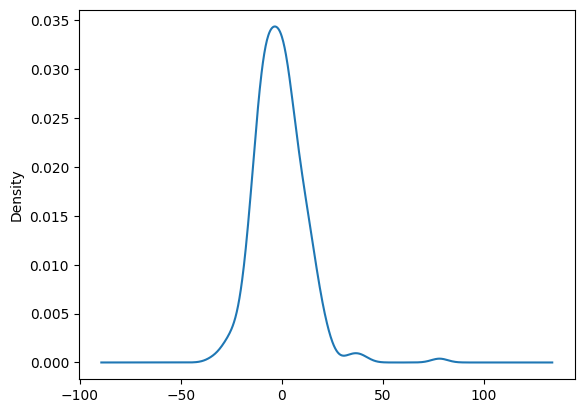

In [412]:
model_fit.resid.plot(kind='kde')

In [413]:
test_data['Predicted_ARIMA']=pred

C:\Users\siddh\AppData\Local\Temp\ipykernel_20340\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='date'>

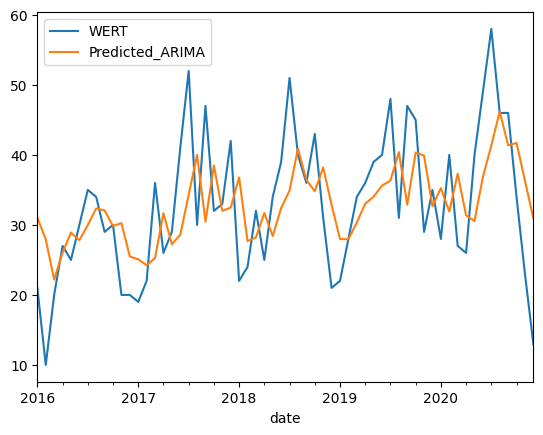

In [414]:
test_data[['WERT','Predicted_ARIMA']].plot()

In [396]:
future_date = datetime(2021, 12, 1)
forecast = results.forecast(steps=(future_date - test_dataset_end).days)

c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [397]:
test_dataset_end

datetime.datetime(2020, 12, 1, 0, 0)

In [399]:
actual = df_com[test_dataset_end + timedelta(days=1):future_date]
actual
# error = actual['WERT'].values - forecast

,WERT,WERT First Difference,WERT 12 Difference
date,,,


In [423]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# model_SARIMA=SARIMAX(train_data['WERT'],order=(1,1,1),seasonal_order=(1,1,1,12))
# model_SARIMA_fit=model_SARIMA.fit()
# model_SARIMA_fit.summary()


In [381]:
# train_dataset_end = datetime(2015, 12, 1)
# test_dataset_end = datetime(2020, 12, 1)
# train_data = df_com[:train_dataset_end]
# test_data = df_com[train_dataset_end + timedelta(days=1):test_dataset_end]


In [415]:
# model = sm.tsa.ARIMA(train_data, order=(1,1,1))a
# results = model.fit()

In [416]:
# ##prediction
# pred_start_date=test_data.index[0]
# pred_end_date=test_data.index[-1]
# print(pred_start_date)
# print(pred_end_date)

In [417]:
# pred_Sarima=model_SARIMA_fit.predict(start=datetime(2019,12,1),end=datetime(2021,12,1))
# residuals=test_data['WERT']-pred_Sarima

In [418]:
# model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

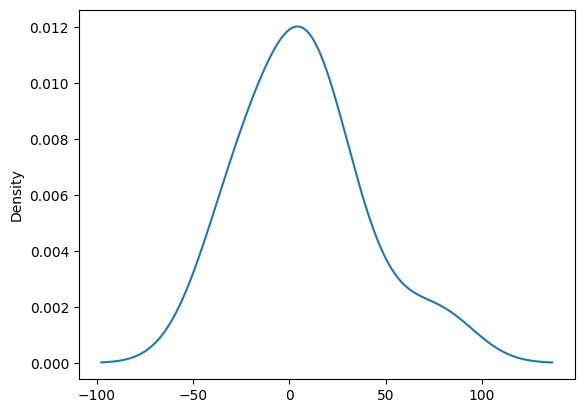

In [361]:
# model_SARIMA_fit.resid.plot(kind='kde')

In [362]:
# test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\siddh\AppData\Local\Temp\ipykernel_20340\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [419]:
# test_data[['WERT','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [258]:
# from datetime import datetime, timedelta
# import pandas as pd

# # Convert index to datetime format
# df_com.index = pd.to_datetime(df_com.index)

# train_dataset_end = datetime(1999, 12, 1)
# test_dataset_end = datetime(2021, 12, 1)

# # Slice the DataFrame up to the train dataset end date
# train_data = df_com.loc[:train_dataset_end]

# # Slice the DataFrame from the day after the train dataset end date to the test dataset end date
# test_data = df_com.loc[train_dataset_end + timedelta(days=1) : test_dataset_end]


In [420]:
# from datetime import datetime, timedelta
# import pandas as pd

# # Reset index and convert date column to datetime format
# df_com = df_com.reset_index().rename(columns={'date': 'Date'})
# df_com['Date'] = pd.to_datetime(df_com['Date'])

# train_dataset_end = datetime(1999, 12, 1)
# test_dataset_end = datetime(2021, 12, 1)

# # Slice the DataFrame up to the train dataset end date
# train_data = df_com.loc[df_com['Date'] <= train_dataset_end]

# # Slice the DataFrame from the day after the train dataset end date to the test dataset end date
# test_data = df_com.loc[(df_com['Date'] > train_dataset_end) & (df_com['Date'] <= test_dataset_end)]


In [421]:
# # Bar Graph for the number of accidents per category
# plt.bar(counts.index, counts['WERT'], color ='green', width = 0.4)
# plt.xlabel("Months")
# plt.ylabel("Number of Accidents")
# plt.title("Number of Accidents per Month")
# plt.show()

In [422]:
# # Bar Graph for the number of accidents per category
# plt.bar(counts.index, counts['WERT'], color ='green', width = 0.4)
# plt.xlabel("Months")
# plt.ylabel("Number of Accidents")
# plt.title("Number of Accidents per Month")
# plt.show()

In [176]:
x_train, y_train, x_test, y_test = train_test_split(df_input, df_output, test_size=0.30, random_state=38)

In [177]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((176, 2), (76, 2), (176, 1), (76, 1))